In [ ]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns
 
iris = load_iris()
 
x= pd.DataFrame(iris.data[: ,: ], columns = iris.feature_names[:])
y = pd.DataFrame(iris.target, columns =["Species"])

Printing the Dataset

In [ ]:
print(x.head())
print(y.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
   Species
0        0
1        0
2        0
3        0
4        0


In [ ]:
x.isna().sum() # checking for null values

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Spliting the Data into training and testing 

In [ ]:
from sklearn.model_selection import train_test_split # Import train_test_split function
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # 70% training and 30% test

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model =tree.DecisionTreeClassifier(random_state=2)
model.fit(X_train,y_train)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best')

In [ ]:
y_pred = model.predict(X_train)
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Model Accuracy, how often is the classifier correct
print("Accuracy:",metrics.accuracy_score(y_train, y_pred) )
print("f1 score",metrics.f1_score(y_train, y_pred,average="micro"))
#it perfeclty train to model

Accuracy: 1.0
f1 score 1.0


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test,y_pred))
print("Accuracy:",round(accuracy_score(y_test,y_pred),2)*100,'%')
print("confusion matrix")
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.88      0.88        16
           2       0.88      0.88      0.88        17

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.91      0.91      0.91        45

Accuracy: 91.0 %
confusion matrix
[[12  0  0]
 [ 0 14  2]
 [ 0  2 15]]


In [ ]:
# from sklearn.tree import export_graphviz
# import graphviz

# dot_data = tree.export_graphviz(model, out_file=None) 
# graph = graphviz.Source(dot_data)  
# graph.render("iris") 
# graph
# Creates dot file named tree.dot


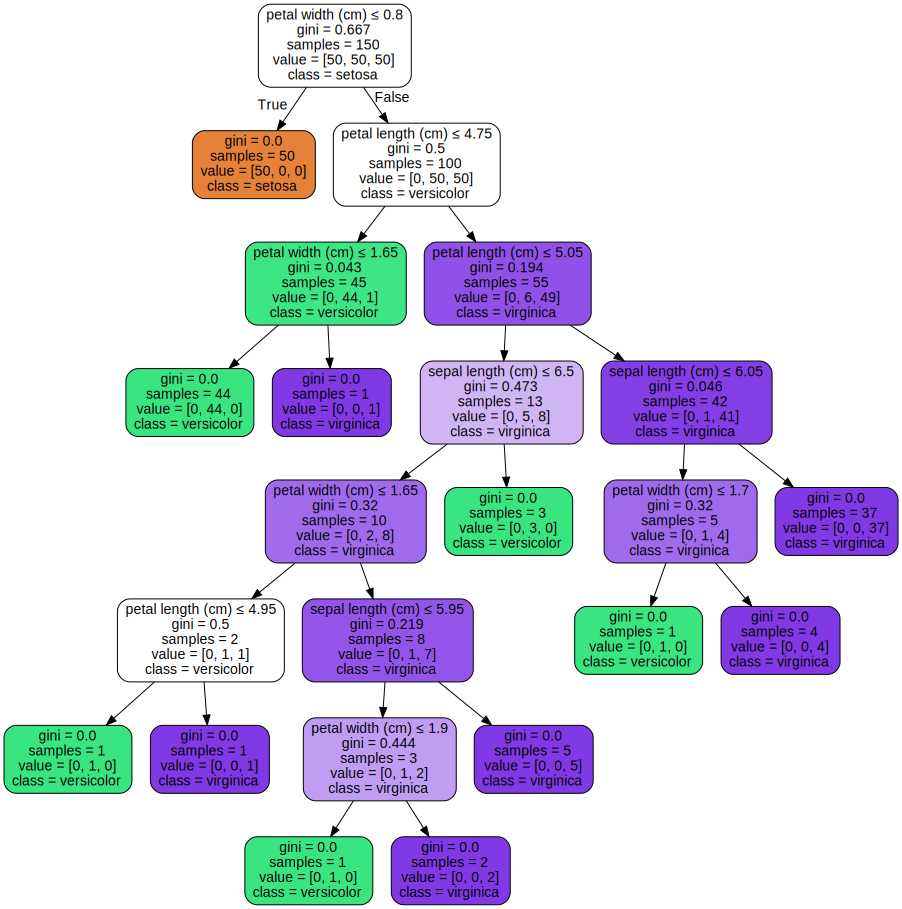

In [ ]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None, 
                      feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

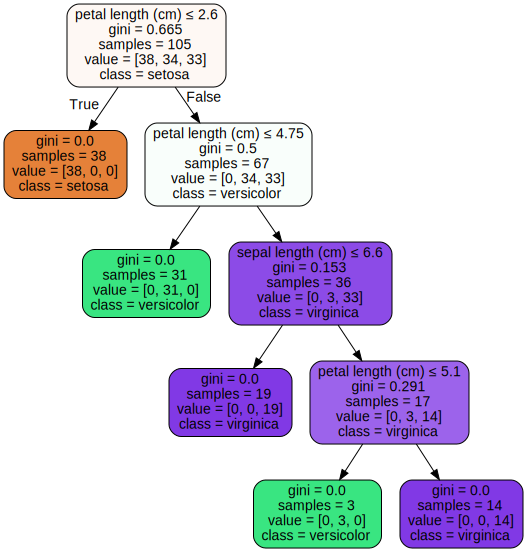

In [ ]:

model2 =tree.DecisionTreeClassifier(max_features='log2')
model2.fit(X_train,y_train)
dot_data = tree.export_graphviz(model2, out_file=None, 
                      feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
y_pred = model2.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,y_pred))
print("Accuracy:",round(accuracy_score(y_test,y_pred),2)*100,'%')

print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.87      0.81      0.84        16
           2       0.83      0.88      0.86        17

    accuracy                           0.89        45
   macro avg       0.90      0.90      0.90        45
weighted avg       0.89      0.89      0.89        45

Accuracy: 89.0 %
[[12  0  0]
 [ 0 13  3]
 [ 0  2 15]]


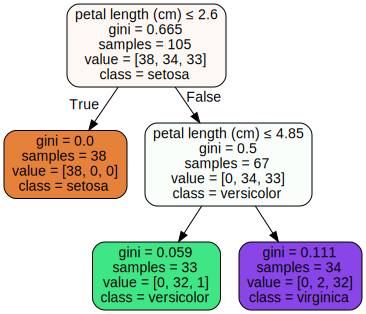

In [ ]:

model3 =tree.DecisionTreeClassifier(min_weight_fraction_leaf=0.3)
model3.fit(X_train,y_train)
dot_data = tree.export_graphviz(model3, out_file=None, 
                      feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
y_pred = model3.predict(X_test)


In [ ]:
print(classification_report(y_test,y_pred))
print("Accuracy:",round(accuracy_score(y_test,y_pred),2)*100,'%')

print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.88      0.88        16
           2       0.88      0.88      0.88        17

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.91      0.91      0.91        45

Accuracy: 91.0 %
[[12  0  0]
 [ 0 14  2]
 [ 0  2 15]]


**Comparision of 3 differnt decision tree model with different hyper parameters**

q3)
MODEL 1:
Model 1 is built with the using random state paramater , random state parameter ensures that every time same data spltting is used(as there can be many permutuation to split the training and test dataset)
it is used to ensure consistent results .the graph produced is full decision tree as there is no parameter to restrict depth or etc .this type of decision will tend to overfit
its accuracy is 91% on test data
Model 2:
model 2 is built using the max_features parameter (which is set to log2 in this case)  so this put a limit to number of features It is computationally heavy to look at all the features every single time, so you can just check some of them using the various max_features options
it also limits overfiting as we can see it limit the depth to 4 which was 6 in first model ,it also has less internal nodes

Model 3:
 model 3 is built using min_weight_fraction_leaf=0.2  which means in_weight_fraction_leaf will then be less biased toward dominant classes ,it has depth of 2 so this model will less likely to overfit it has least number of nodes
min_weight_fraction_leaf is the fraction of the input samples required to be at a leaf node where weights are determined by sample_weight, this is a way to deal with class imbalance also.


q4)
model 3 is better as it has 91% accuracy and also better f1 score .model 1 has the best accuracy but it is not choosen because it is overfitted and it will give (it also train with 100% accuracy on training dataset) .it may not perform well on other unseen data
model 3 also has more f1 score (it can also be seen that it give less false negatives and false positives)
model 2 is not choosen as it has less accuracy than other models and less f1 score as well (indicating more false positive from confusion matrix )